# Equações diferenciais e o Circuito de Chua

---

**Como entregar:** Enviar o seu jupyter notebook (.ipynb) pelo próprio Classroom. Uma cópia deste será automaticamente criada para você no seu Google Drive, você pode usar essa cópia mesmo, sem necessidade de criar outra.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais.
*   Use o Google Colab para executar o notebook e fazer a tarefa, ou baixe no seu computador e faça na API que preferir, mas lembre-se de entregar no Classroom a versão final.
*   A atividade vai ser baseada no seu número USP.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo as perguntas das atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Entregue o notebook completo, com todo conteúdo original e mais os seus códigos e textos.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 00:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:




*Assinatura:* João Pedro Lopes Wunderlich


---



## Preliminares

In [ ]:
import numpy as np  # Numpy
import matplotlib.pyplot as plt  # Gráficos/figuras
from prettytable import PrettyTable  # Tabelas mais bonitinhas

Referências:
*   https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.01-ODE-Initial-Value-Problem-Statement.html

#### ❗Exercício 0❗

Preencha o seu número USP abaixo

In [ ]:
# Coloque aqui o seu número USP
nusp = 10282536

nusp_str = str(nusp).replace("0", "")

magic_ilong = int(nusp_str)
magic_int = int(str(magic_ilong)[-1:]) * 10
# magic_int = int(list(set(nusp_str))[0])

print("magic_ilong  =", magic_ilong)
print("magic_int =", magic_int)



---



## O problema de Valor Inicial

Nosso problema em questão é o de achar uma função $u \in \mathcal{C}^1([t_0, T])$, que resolva a equação
$$
u'(t) = f(t,u(t)),
$$
para uma dada função $f(t,u)$, suficientemente suave, considerando conhecido o valor inicial de $u$,
$$
u(t_0)=u_0.
$$

Este problema é conhecido como problema de valor inicial, ou problema de Cauchy.

Observações:
*   A função $u$ pode ser uma função com imagem em $\mathbb{R}$ ou em $\mathbb{R}^n$, isto é, $u$ pode ser uma função vetorial
*   Se $u$ é vetorial ($u:[t_0, T] → \mathbb{R}^n$), então $f$ também deve ser, ($f:[t_0, T]\times \mathbb{R}^n → \mathbb{R}^n$), assim como $u_0\in \mathbb{R}^n$.
*   Nesses casos vetoriais, temos um sistema de equações diferenciais.



---



## Discretização

Vamos discretizar o tempo dividindo o intervalo de tempo em $n$ subintervalos uniformemente espaçados, obtendo
 $$t_k=\frac{k}{n}(T-t_0)+t_0, \quad k=0, 1, ..., n.$$

 Chamaremos o passo de tempo de $h$,
 $$
h= \frac{T-t_0}{n}.
 $$

Definimos $u_k$ como sendo uma aproximação da função desejada no tempo $t_k$, isto é,

$$
u_k \approx u(t_k)
$$

Nosso objetivo é obter boas aproximações para $u(t_k)$.

Da série de Taylor, sabemos que
$$
u(t_{k+1})=u(t_k)+hu'(t_k)+O(h^2).
$$
Usando a definição do problema de Cauchy, temos que
$$
u(t_{k+1})=u(t_k)+hf(t_k, u(t_k))+O(h^2).
$$

Isso é a base para a construção do método de Euler para resolução do problema de valor inicial. O método de Euler é então dado por
$$
u_{k+1}=u_k+hf(t_k, u_k),
$$
que está bem definido se $u_0$ for dado.


### Primeiro Exemplo

Considere o problema de valor inicial dado por

$$
\begin{cases}
u'(t)=\lambda u(t), \quad  t \in [0,1]\\
u(0) = 1
\end{cases}
$$

Este problema tem solução analítica dada por $u(t)=e^{\lambda t}$.

In [ ]:
# Definição do problema
t0 = 0
T = 1
u0 = 1.0
lam = 1


def f(t, u):
    return lam * u


# Solução teórica
def u_aproximado(t):
    return np.exp(lam * t)

Campo vetorial e soluções "tangentes":

In [ ]:
n = 20

# Grade de plotagem
t_tmp = np.linspace(t0, T, n + 1)
u_tmp = np.arange(0, 3, 0.15)
t_grid, u_grid = np.meshgrid(t_tmp, u_tmp)

# du/dt=f(t,u)
# Gradient (dt/dt, du/dt) = (1, f(t,u))
DT = np.ones_like(t_grid)  # 1
DU = u_grid  # lambda u

# Curva de solução
u0 = 1
u_t = np.exp(t_tmp)

# Vetores do campo
fig, ax = plt.subplots()
q = ax.quiver(t_grid, u_grid, DT, DU, angles="xy", label="f(t,u)")
ax.plot(t_tmp, u_t, label="u(t)=exp(t)")
ax.plot(0.0, u0, "ro", label="Cond Inicial")
ax.set_xlabel("Tempo")
ax.set_ylabel("u")
plt.legend()
plt.show()

Na figura acima, temos o sistema de coordenadas dados por $(t,u)$, e estamos plotando a curva $(t,u(t))$. O gradiente desta curva é campo de vetores, dado por
$$
\frac{d}{dt}(t, u(t)) = (1, u'(t)) = (1, f(t,u)).
$$
Portanto, os vetores, $(1, f(t,u))$, para cada $(t,u)$, representados em preto na figura, estarão sempre tangentes a curva.

Em outro ponto de vista, queremos achar a curva $(t,u(t))$, começando no ponto $(t_0, u_0)$, que seja tangente a esse campo de vetores.




---



Implementação de um primeiro método numérico: Euler

In [ ]:
# O método de Euler
def euler(u0, t0, T, f, n):
    h = (T - t0) / n
    u = np.empty(n + 1)
    u[0] = u0
    for k in range(0, n):
        tk = t0 + k * h
        u[k + 1] = u[k] + h * f(tk, u[k])
    return u

In [ ]:
n = 10

t_aproximado = np.linspace(t0, T, n + 1)
u_aprox = euler(u0, t0, T, f, n)
u_exata = u_aproximado(t_aproximado)

erro_final = np.abs(u_aprox[-1] - u_exata[-1])

tab = PrettyTable(["n", "u Euler", "u Exata", "Erro Max"])
tab.add_row([n, u_aprox[-1], u_exata[-1], erro_final])
print(tab)

In [ ]:
figure, axs = plt.subplots(figsize=(10, 8))
plt.plot(t_aproximado, u_aprox, ".", label="Euler", linewidth=1)
plt.plot(t_aproximado, u_exata, label="Exata", linewidth=1)
plt.xlabel("t")
plt.ylabel("u")
plt.grid()
plt.legend()
plt.show()



---



Questão importante:

>  O que acontece com o erro quando aumentamos o número de pontos no tempo? (diminuímos $h$).


In [ ]:
tab = PrettyTable(["n", "u Euler", "u Exata", "Erro Max"])
n_list = [1, 2, 4, 8, 16]

figure, axs = plt.subplots(figsize=(10, 8))
plt.plot(t_aproximado, u_exata, label="Exata", linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in n_list:
    t_aproximado = np.linspace(t0, T, n + 1)
    u_aprox = euler(u0, t0, T, f, n)
    u_exata = u_aproximado(t_aproximado)

    erro_final = np.abs(u_aprox[-1] - u_exata[-1])
    tab.add_row([n, u_aprox[-1], u_exata[-1], erro_final])

    plt.plot(
        t_aproximado, u_aprox, "-o", label="Euler-" + str(n), linewidth=1, markersize=2
    )

plt.grid()
plt.legend()
plt.show()

print(tab)

In [ ]:
tab = PrettyTable(["n", "u Euler", "u Exata", "Erro Max", "Razão"])

erro_final = []
for n in range(10):
    n = 2**n
    t_aproximado = np.linspace(t0, T, n + 1)
    u_aprox = euler(u0, t0, T, f, n)
    u_exata = u_aproximado(t_aproximado)

    erro_final.append(np.abs(u_aprox[-1] - u_exata[-1]))
    if n > 1:
        tab.add_row(
            [
                n,
                u_aprox[-1],
                u_exata[-1],
                erro_final[-1],
                erro_final[-2] / erro_final[-1],
            ]
        )


print(tab)

Note que o erro cai pela metade (aproximadamente) quando dobramos o número de pontos (reduzimos o $h$ pela metade). Logo, dizemos que o método é de primeira ordem $O(h^1)$.

Isso será, ou foi, demonstrado em sala nas aulas teóricas.



---



###❗Exercício 1❗

Considere o problema de valor inicial

$$
\begin{cases}
u'(t)=-2\,tu^2/a, \quad  t \ge 0\\
u(0) = 1
\end{cases}
$$
onde $a$ é uma constante positiva.
Este problema tem solução analítica dada por
$$
  u(t) = \frac{1}{1 + t^2/a}.
$$

Vamos analisar o comportamento do erro para o Método de Euler com este exemplo. Posteriormente, iremos comparar os resultados com outro método.

Atividade:
1.   Defina $a =$ magic_int, ou seja, $a$ será o valor do seu último dígito não nulo do número usp multiplicado por 10.
2.   Resolva o problema no intervalo $[0,\sqrt{a}]$ usando o método de Euler com $2^k$ passos, $0 \le k \le 9$ (ou seja, $n=2^k$, $h=\sqrt{a}/2^k$, $0 \le k \le 9$.
3.   Apresente um gráfico com a solução exata e as aproximações para $n = 4, 8$ e $16$.
4.   Construa uma tabela apresentando, para os $10$ valores de $n$ usados, os valores da solução exata e das aproximações em $T=\sqrt{a}$, o valor absoluto dos erros em $T=\sqrt{a}$ e a razão entre estes erros para valores de $n$ consecutivos. O erro se comporta de acordo com o esperado?


In [ ]:
# Códigos

# Definição do problema
a = magic_int
t0 = 0
T = np.sqrt(a)
u0 = 1.0


def f(t, u):
    return -2 * t * u**2 / a


# Solução teórica
def u(t):
    return 1 / (1 + t**2 / a)


# Valores de n
n_list = [2**k for k in range(10)]


# O método de Euler
def euler(f, t0, T, u0, n):
    h = (T - t0) / n
    t = np.linspace(t0, T, n + 1)
    u = np.zeros(n + 1)
    u[0] = u0
    for k in range(n):
        u[k + 1] = u[k] + h * f(t[k], u[k])
    return t, u


# Resolvendo para diferentes valores de n
resultados = {}
for n in n_list:
    t_aproximado, u_aproximado = euler(f, t0, T, u0, n)
    resultados[n] = (t_aproximado, u_aproximado)

# Gráfico
t_exato = np.linspace(t0, T, 1000)
u_exato = u(t_exato)

plt.figure(figsize=(10, 8))
plt.plot(t_exato, u_exato, label="Exata", linewidth=1)
plt.xlabel("t")
plt.ylabel("u")

for n in [4, 8, 16]:
    t_aproximado, u_aproximado = resultados[n]
    plt.plot(
        t_aproximado,
        u_aproximado,
        "o-",
        label="Euler-" + str(n),
        linewidth=1,
        markersize=2,
    )

plt.legend()
plt.show()

tab = PrettyTable(["n", "u Euler", "u Exata", "Erro Max", "Razão"])

# Tabela de erros
erro_final = []
t_exato = u(T)

for i in range(len(n_list)):
    n = n_list[i]
    _, u_aproximado = resultados[n]
    t_aproximado = u_aproximado[-1]
    erro_valor_final = abs(t_exato - t_aproximado)
    if i == 0:
        erro_razao = "-"
    else:
        erro_razao = erro_final[-1]["Erro Max"] / erro_valor_final
    erro_final.append(
        {
            "n": n,
            "u Euler": t_aproximado,
            "u Exata": t_exato,
            "Erro Max": erro_valor_final,
            "Razão": erro_razao,
        }
    )
    tab.add_row(
        [
            n,
            t_aproximado,
            t_exato,
            erro_valor_final,
            erro_razao,
        ]
    )

print(tab)

Respostas:

Sim, o erro se comporta conforme o esperado, já que o erro cai pela metade (aproximadamente) quando dobramos o número de pontos n. Logo, dizemos que o método é de primeira ordem $O(h^1)$.

---



---



### Método de 2a ordem

Como vimos anteriormente, o método de Euler é um método de 1a ordem $O(h)$, isto é, quando reduzimos $h$ pela metade, o erro cai aproximadamente pela metade.

Podemos obter um método de segunda ordem, isto é, com erro da ordem de $h^2$, indicado por $O(h^2)$, usando o método explicito do trapézio, também conhecido como Euler Aprimorado:

$$
u_{k+1}=u_k+\frac{h}{2}\left( f(t_k, u_k)+f(t_k+h, u_k+hf(t_k, u_k))\right),
$$
que pode ser implementado em 2 estágios:
$$
\kappa_1 = f(t_k, u_k) \\
\kappa_2 = f(t_k+h, u_k+h\kappa_1)\\
u_{k+1} = u_k+\frac{h}{2}\left(\kappa_1+\kappa_2 \right)
$$

### ❗Exercício 2❗




1.  Implemente uma função de Python para o método de Euler Aprimorado, de forma similar ao feito para Euler, para um problema de Cauchy geral.

2.  Teste sua implementação para o mesmo problema do Exercíco 2:
$$
\begin{cases}
u'(t)=-2\,tu^2/a, \quad  t \ge 0\\
u(0) = 1
\end{cases},
$$
cuja solução exata é
$$
  u(t) = \frac{1}{1+t^2/a},
$$
onde $a =$ magic_int (valor do seu último dígito não nulo do número usp multiplicado por 10). Use $t_0=0$ e $T=\sqrt{a}$. Faça os testes com os mesmos valores de $n$ usados no Exercício 1: $n=2^k$, $0 \le k \le 9$.
3. Apresente um gráfico com a solução exata e as aproximações para $n = 4, 8$ e $16$.

4. Construa uma tabela apresentando, para os $10$ valores de $n$ usados, os valores da solução exata e das aproximações em $T=\sqrt{a}$, o valor absoluto dos erros em $T=\sqrt{a}$ e a razão entre estes erros para valores de $n$ consecutivos.

**Responda:**

1. O erro se comporta como esperado?
2. Um passo do Método de Euler Aprimorado usa duas avaliações de $f$, enquanto que um passo do Método de Euler usa apenas uma avaliação de $f$. Compare o número total de avaliações de $f$ em cada método para erros com a mesma ordem de grandeza (olhe a sua tabela). Compensa usar um método de ordem maior, porém mais caro em cada passo?


In [ ]:
# Códigos

# Definição do problema
a = magic_int
t0 = 0
T = np.sqrt(a)
u0 = 1.0


def f(t, u):
    return -2 * t * u**2 / a


# Solução teórica
def u_exact(t):
    return 1 / (1 + t**2 / a)


# Valores de n
n_list = [2**k for k in range(10)]


def euler_aprimorado(f, t0, T, u0, n):
    h = (T - t0) / n
    t = np.linspace(t0, T, n + 1)
    u = np.zeros(n + 1)
    u[0] = u0
    for k in range(n):
        k1 = f(t[k], u[k])
        k2 = f(t[k] + h, u[k] + h * k1)
        u[k + 1] = u[k] + h * (k1 + k2) / 2
    return t, u


n_values = [2**k for k in range(10)]

results = {}
for n in n_values:
    t, u = euler_aprimorado(f, t0, T, u0, n)
    results[n] = (t, u)

t_exato = np.linspace(t0, T, 1000)
u_exato_vals = u_exact(t_exato)

plt.figure(figsize=(10, 8))
plt.plot(t_exato, u_exato_vals, label="Exata", linewidth=1)

for n in [4, 8, 16]:
    t, u = results[n]
    plt.plot(t, u, "o-", label="Euler Aprimorado-" + str(n), linewidth=1, markersize=2)

plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.show()

tab = PrettyTable(["n", "u Euler", "u Exata", "Erro Max", "Razão"])

erro_final = []
for i in range(len(n_values)):
    n = n_values[i]
    _, u_aproximado = results[n]
    t_aproximado = u_aproximado[-1]
    t_exato = u_exact(T)
    erro_valor_final = abs(t_exato - t_aproximado)
    if i == 0:
        erro_razao = "-"
    else:
        erro_razao = erro_final[-1]["Erro Max"] / erro_valor_final
    erro_final.append(
        {
            "n": n,
            "u Euler": t_aproximado,
            "u Exata": t_exato,
            "Erro Max": erro_valor_final,
            "Razão": erro_razao,
        }
    )
    tab.add_row(
        [
            n,
            t_aproximado,
            t_exato,
            erro_valor_final,
            erro_razao,
        ]
    )

print(tab)

Respostas:

1. Sim, o erro se comporta como o esperado, pois diminui proporcionalmente ao quadrado da redução do passo _h_. Vemos que, a partir de _n_ = 8, razão do erro se aproxima de 4 quando _n_ dobra, indicando um método de segunda ordem $O^2$.


2. Compensa utilizar o método de Euler aprimorado para se obter erros de ordem de grandeza <= $10^{-4}$, já que no método de Euler utilizamos 64 passos (64 avaliações de f) para obter essa precisão, e no método de Euler aprimorado utilizamos 16 passos (16 * 2 = 32 avaliações de f). 



---



## Pêndulo simples

A maior parte das aplicações interessantes baseadas em equações diferenciais são modeladas com equações de ordens mais altas (derivadas segundas, terceiras, ...) ou vem de sistemas de equações de equações diferenciais. Vejamos um exemplo, o do pêndulo simples.

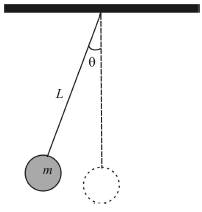

Um pêndulo simples consiste em um fio de comprimento $L$ e massa desprezível com uma extremidade fixada e outra amarrada em uma massa pontual $m$. O ângulo $\theta(t)$ que a massa faz com o eixo vertical sob ação da aceleração da gravidade $g$, sem atrito, satisfaz a seguinte equação diferencial ordinária

$$
\theta''(t) = -\frac{g}{L}\sin(\theta(t)).
$$

Gostaríamos de resolver este problema numericamente. Para isso, consideramos uma variável $\omega = \theta'$, a velocidade angular, e obtemos o seguinte sistema de equações de primeira ordem

\begin{align}
\theta'(t) &= \omega(t)\\
\omega'(t) &= -\frac{g}{L}\sin(\theta(t)).
\end{align}



Para usar os métodos numéricos precisamos agora definir o problema de forma vetorial,

$$
u'=f(t,u),
$$
onde
$$
u = [\theta, \omega],
$$
e
$$
f(t,u) = [ f_1(t,u), f_2(t,u) ] =  [\omega, -\frac{g}{L}\sin(\theta)].
$$

In [ ]:
# Definição do problema
t0 = 0.0  # Tempo inicial
T = 8.0  # Tempo final
u0 = np.array(
    [np.pi / 6, 0.0]
)  # posição angular inicial (theta0) e velocidade angular inicial (omega0)
g = 9.81  # Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
L = 1.2  # comprimento do fio (metros)
n = 1000  # Número de passos que daremos no tempo


def f(
    t, u
):  # note que essa função agora recebe um vetor [theta, w] e devolve um vetor [f1(theta, w), f2(theta, w)]
    return np.array([u[1], -(g / L) * np.sin(u[0])])

Podemos (devemos!) ajustar o nosso código para ele ser vetorial. Mas nota que ele só precisa saber quem é $u$ e $f$, e vale para outros sistemas de equações diferenciais ordiárias se mudarmos $u$ e $f$.

Abaixo mostramos um exemplo de um método conhecido como Runge-Kutta 44,


\begin{align}
κ_1 &= f(t_k,u_k), \\
κ_2 &= f\left(t_k + \frac{h}{2} ,u_k + \frac{h}{2}\kappa_1 \right), \\
κ_3 &= f\left(t_k + \frac{h}{2} ,u_k + \frac{h}{2}\kappa_2 \right), \\
κ_4 &= f\left(t_k + h ,u_k + h\kappa_3 \right), \\
\end{align}

$$
u_{k+1}=u_{k}+\frac{h}{6}(\kappa_1 + 2\kappa_2 + 2\kappa_3+ \kappa_4).
$$

In [ ]:
## O método de Runge-Kutta 4 4 vetorial
def rk44_vet(u0, t0, T, f, n):
    h = (T - t0) / n
    dim = u0.size
    u = np.empty((n + 1, dim))
    u[0, :] = u0
    for k in range(0, n):
        tk = t0 + k * h
        kappa1 = f(tk, u[k, :])
        kappa2 = f(tk + h / 2, u[k, :] + h * kappa1 / 2)
        kappa3 = f(tk + h / 2, u[k, :] + h * kappa2 / 2)
        kappa4 = f(tk + h, u[k, :] + h * kappa3)
        u[k + 1, :] = u[k, :] + h * (kappa1 + 2 * kappa2 + 2 * kappa3 + kappa4) / 6.0
        # print(k, u[k,:])
        if np.max(np.max(u[k, :])) > 10e5:
            print("Método instável...desisto!")
            return u
    return u

Vejamos a solução do prolema ao longo do tempo (nas duas variáveis, $\theta$ e $\omega=\theta'$). Note que o ângulo está em radianos.

In [ ]:
u_sol = rk44_vet(u0, t0, T, f, n)

t_aproximado = np.linspace(t0, T, n + 1)
figure, axs = plt.subplots(figsize=(10, 8))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(
    t_aproximado, u_sol[:, 0], "-o", label=r"$\theta(t)$", linewidth=1, markersize=2
)
plt.plot(
    t_aproximado, u_sol[:, 1], "-o", label=r"$\theta'(t)$", linewidth=1, markersize=2
)
plt.legend()
plt.grid(alpha=0.2)
plt.title("Solução do problema")

Podemos fazer o gráfico das soluções no plano $\theta \times \omega$, esboçando assim uma trajetória no retrato de fases do sistema de EDOs. Notamos que parece que a trajetória tem uma periodicidade, com o sistema retornando ao estado inicial passado um certo tempo.

In [ ]:
figure, axs = plt.subplots(figsize=(10, 8))
plt.xlabel(r"$\theta(t)$")
plt.ylabel(r"$\theta'(t)$")
plt.plot(u_sol[:, 0], u_sol[:, 1], "-o", linewidth=1, markersize=0)
plt.grid(alpha=0.2)
plt.title(r"Curva $\theta(t) \times \theta'(t)$")



---



## O método de Runge-Kutta-Fehlberg

Os métodos númericos para resolução de equações diferenciais ordinárias fazem uso de um espaçamento $h$ no tempo a cada passo. A precisão atingida pelo método depende deste valor de $h$. Neste sentido, descrevemos uma técnica para melhorar a precisão de forma eficiente.

Considere dois métodos numéricos, um de ordem $p$, e outro de ordem $p+1$, que a partir do valor $x_i$ geram a aproximação para $x(t_{i+1})$ respectivamente como:

\begin{align}
x_{i+1} &= x_i +  h\,\Phi(t_i,x_i,h) \quad \text{e }\\
\tilde{x}_{i+1} &= x_i +  h\,\tilde{\Phi}(t_i,x_i,h).
\end{align}

Assumindo que a aproximação $x_i$ no instante $t_i$ seja praticamente igual à solução $x(t_i)$, o erro de truncamento para o método de ordem $p$ pode ser escrito como

$$
\tau_{i+1}(h) = \frac{\tilde{x}_{i+1} - x_{i+1}}{h}.
$$

Por meio desta expressão, pode-se estimar o erro de truncamento e verificar se este se encontra dentro da ordem de precisão desejada e se é necessário aumentar ou reduzir o espaçamento $h$. Usando que

$$
\tau_{i+1}(h) \approx Ch^p
$$

onde $C \in \mathbb{R}$ e se utilizarmos um novo espaçamento $\tilde{h} = \alpha h$, teríamos

$$
\tau_{i+1}(h) ≈ C(\alpha h)^p ≈ \alpha^p \tau_{i+1}(h)  \approx \alpha^p \frac{\tilde{x}_{i+1} - x_{i+1}}{h}.
$$

Como desejamos que a norma do erro de truncamento seja menor que uma tolerância $ɛ$, devemos ter

$$
\alpha \leq \left( \frac{ɛh}{c ||\tilde{x}_{i+1} - x_{i+1}||}\right)^{1/p},
$$
onde $c>1$ é um fator de segurança.

Assim, descrevemos o método de Runge-Kutta-Fehlberg. A ideia é considerar métodos de quarta e quinta ordem que compartilhem o cálculo dos mesmos estágios. Em função das aproximações encontradas, estima-se o erro local de truncamento $\tau_{i+1}$ como explicado anteriormente. Caso este valor seja menor de $ɛ$, o valor de $x_{i+1}$ obtido pelo método de quarta ordem é aceito como aproximação no instante $t_{i+1}$ e multiplicamos o passo por $\alpha$, empregando um fator de segurança, por exemplo, $c=2$.

No caso de $\tau_{i+1}$ ser maior que $ɛ$, o valor de $x_{i+1}$ é rejeitado. Multiplica-se $h$ por $\alpha$ e refazemos os cálculos de $x_{i+1}$ e $\tilde{x}_{i+1}$. Uma vez que $x_{i+1}$ tenha sido aceito, procede-se ao cálculo da solução no próximo passo usando o mesmo procedimento. O método termina quando atinge-se o instante final desejado. Para garantir que o instante final $T$ não seja ultrapassado, pode-se limitar o valor de $h$ a cada passo fazendo que este seja no máximo igual a $T - t_i$. Também é aconselhável que o passo seja majorado inferiormente e superiormente para evitar valores pequenos ou grandes demais.

Os métodos ultizados requerem $6$ estágios dados por

\begin{align}
κ_1 &= hf(t_i,x_i) \\
κ_2 &= hf\left(t_i + \frac{1}{4}h ,x_i + \frac{1}{4}\kappa_1 \right) \\
κ_3 &= hf\left(t_i + \frac{3}{8}h ,x_i + \frac{3}{32}\kappa_1 + \frac{9}{32}\kappa_2 \right) \\[0.2cm]
κ_4 &= hf\left(t_i + \frac{12}{13}h ,x_i + \frac{1932}{2197}\kappa_1 - \frac{7200}{2197}\kappa_2 + \frac{7296}{2197}\kappa_3\right) \\[0.2cm]
κ_5 &= hf\left(t_i + h ,x_i + \frac{439}{216}\kappa_1 - 8\kappa_2 + \frac{3680}{513}\kappa_3 - \frac{845}{4104}\kappa_4\right) \\[0.2cm]
κ_6 &= hf\left(t_i + \frac{1}{2}h ,x_i - \frac{8}{27}\kappa_1 + 2\kappa_2 - \frac{3544}{2565}\kappa_3 + \frac{1859}{4104}\kappa_4 - \frac{11}{40}\kappa_5\right).
\end{align}

O método de quarta ordem é dado por

$$
x_{i+1} = x_i + \frac{25}{216}\kappa_1 + \frac{1408}{2565}\kappa_3 + \frac{2197}{4104}\kappa_4 - \frac{1}{5}\kappa_5,
$$

enquanto que o de ordem $5$ é obtido por

$$
\tilde{x}_{i+1} = x_i + \frac{16}{135}\kappa_1 + \frac{6656}{12825}\kappa_3 + \frac{28561}{56430}\kappa_4 - \frac{9}{50}\kappa_5 + \frac{2}{55}\kappa_6.
$$

Note que os dois métodos usam os mesmos estágios ($\kappa s)$, logo o custo computacional desse método não é o mesmo de calcular dois métodos separadamente, pois as contas são aproveitadas nos dois métodos!

------------------

### ❗ Exercício 3  ❗

1. Implemente o método de quarta ordem do RKF com o pêndulo simples usando condições iniciais $\theta_0=\pi/6$ e $\omega_0=0$. Use os mesmos parâmetros do problema anterior do pêndulo simples com $n=100$ passos de tempo e calcule o erro cometido com base em uma simulação com método RK44 usado anteriormente, usando n=1000 passos de tempo. Calcule o erro no instante final.
2. Implemente o método de 5 ordem do RKF e repita o procedimento do item 1, calculando o erro obtido no instante de tempo final. Compare os erros obtidos do método de 4a e 5a ordens.
3. Implemente o método RKF completo, isto é, que calcula simulaneamente o método de 4a e 5a ordem, e controla o passo de tempo com base no valor de $\alpha$. Neste caso, considere:
  - $ϵ = 10^{-4}$
  - $ϵ = 10^{-6}$

Compute o erro final comparando com o método RK44 com 1000 passos de tempo. Ao final, veja quantos passos de tempo o método RKF teve que executar para chegar nesse erro.

4. Experimente colocar o pêndulo no planeta de Júpiter (o valor da aceleração da gravidade vai mudar!). Neste caso, o pêndulo vai oscilar mais rápido ou devagar? Simule o caso usando o método RKF e o RK44. Avalie quantos passos de tempo o RKF dá em Jupiter e compare com a quantidade de passos que o método precisou na simulação na Terra. Qual o motivo da diferença?


In [ ]:
# Implementação: Definição de Funções do Item 1.

# Definição do problema
t0 = 0.0  # Tempo inicial
T = 8.0  # Tempo final
u0 = np.array(
    [np.pi / 6, 0.0]
)  # posição angular inicial (theta0) e velocidade angular inicial (omega0)
g = 9.81  # Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
L = 1.2  # comprimento do fio (metros)
n_rkf4 = 100  # Número de passos que daremos no tempo para RKF4
n_rkf5 = 100  # Número de passos que daremos no tempo para RKF5
n_rk44 = 1000  # Número de passos que daremos no tempo para RK44


def f(
    t, u
):  # note que essa função agora recebe um vetor [theta, w] e devolve um vetor [f1(theta, w), f2(theta, w)]
    theta, omega = u
    return np.array([omega, -g / L * np.sin(theta)])


def rkf4(f, t0, T, u0, n_rkf):
    h = (T - t0) / n_rkf
    dim = u0.size
    u = np.empty((n_rkf + 1, dim))
    u[0, :] = u0
    for k in range(0, n_rkf):
        tk = t0 + k * h
        u_current = u[k, :]
        kappa1 = h * f(tk, u_current)
        kappa2 = h * f(tk + h / 4, u_current + kappa1 / 4)
        kappa3 = h * f(tk + 3 * h / 8, u_current + 3 * kappa1 / 32 + 9 * kappa2 / 32)
        kappa4 = h * f(
            tk + 12 * h / 13,
            u_current
            + 1932 * kappa1 / 2197
            - 7200 * kappa2 / 2197
            + 7296 * kappa3 / 2197,
        )
        kappa5 = h * f(
            tk + h,
            u_current
            + 439 * kappa1 / 216
            - 8 * kappa2
            + 3680 * kappa3 / 513
            - 845 * kappa4 / 4104,
        )
        u[k + 1, :] = u[k, :] + (
            25 * kappa1 / 216 + 1408 * kappa3 / 2565 + 2197 * kappa4 / 4104 - kappa5 / 5
        )
    return u


def rkf5(f, t0, T, u0, n_rkf):
    h = (T - t0) / n_rkf
    dim = u0.size
    u = np.empty((n_rkf + 1, dim))
    u[0, :] = u0
    for k in range(0, n_rkf):
        tk = t0 + k * h
        u_current = u[k, :]
        kappa1 = h * f(tk, u_current)
        kappa2 = h * f(tk + h / 4, u_current + kappa1 / 4)
        kappa3 = h * f(tk + 3 * h / 8, u_current + 3 * kappa1 / 32 + 9 * kappa2 / 32)
        kappa4 = h * f(
            tk + 12 * h / 13,
            u_current
            + 1932 * kappa1 / 2197
            - 7200 * kappa2 / 2197
            + 7296 * kappa3 / 2197,
        )
        kappa5 = h * f(
            tk + h,
            u_current
            + 439 * kappa1 / 216
            - 8 * kappa2
            + 3680 * kappa3 / 513
            - 845 * kappa4 / 4104,
        )
        kappa6 = h * f(
            tk + h / 2,
            u_current
            - 8 * kappa1 / 27
            + 2 * kappa2
            - 3544 * kappa3 / 2565
            + 1859 * kappa4 / 4104
            - 11 * kappa5 / 40,
        )
        u[k + 1, :] = u[k, :] + (
            16 * kappa1 / 135
            + 6656 * kappa3 / 12825
            + 28561 * kappa4 / 56430
            - 9 * kappa5 / 50
            + 2 * kappa6 / 55
        )
    return u


def calc_erro(u_rkf, u_rk44):
    erro_theta = abs(u_rkf[-1, 0] - u_rk44[-1, 0])
    erro_theta_linha = abs(u_rkf[-1, 1] - u_rk44[-1, 1])
    return erro_theta, erro_theta_linha


def item_01(u0, t0, T, f, n_rkf, n_rk44):

    u_rkf4 = rkf4(f, t0, T, u0, n_rkf)
    u_rk44 = rk44_vet(u0, t0, T, f, n_rk44)

    erro_theta, erro_theta_linha = calc_erro(u_rkf4, u_rk44)

    return u_rkf4, u_rk44, erro_theta, erro_theta_linha


def item_02(u0, t0, T, f, n_rkf, n_rk44):

    u_rkf5 = rkf5(f, t0, T, u0, n_rkf)
    u_rk44 = rk44_vet(u0, t0, T, f, n_rk44)

    erro_theta, erro_theta_linha = calc_erro(u_rkf5, u_rk44)

    return u_rkf5, u_rk44, erro_theta, erro_theta_linha

### Item 01 e 02

In [ ]:
# Implementação: Cálculo e Apresentação de Valores do Item 1.

print("Item 01 - RKF4 vs RK44")
u_rkf4, u_rk44, erro_theta, erro_theta_linha = item_01(u0, t0, T, f, n_rkf4, n_rk44)
print("erro theta(t): ", erro_theta)
print("erro theta'(t): ", erro_theta_linha)

print("\n")

u_rkf5, u_rk44, erro_theta, erro_theta_linha = item_02(u0, t0, T, f, n_rkf5, n_rk44)
print("Item 02 - RKF5 vs RK44")
print("erro theta(t): ", erro_theta)
print("erro theta'(t): ", erro_theta_linha)

t_aproximado_rkf = np.linspace(t0, T, n_rkf4 + 1)
t_aproximado_rk44 = np.linspace(t0, T, n_rk44 + 1)
t_aproximado_valor_final = np.linspace(t0, T, 1)

figure, axs = plt.subplots(figsize=(5, 4))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(
    t_aproximado_valor_final,
    u_rkf5[-1, 0],
    "-o",
    label=r"RKF5",
    linewidth=1,
    markersize=2,
)
plt.plot(
    t_aproximado_valor_final,
    u_rkf4[-1, 0],
    "-o",
    label=r"RKF4",
    linewidth=1,
    markersize=2,
)
plt.plot(
    t_aproximado_valor_final,
    u_rk44[-1, 0],
    "-o",
    label=r"RK44",
    linewidth=1,
    markersize=2,
)
plt.legend()
plt.grid(alpha=0.2)
plt.title(r"Valor Final - $\theta(t)$")

figure, axs = plt.subplots(figsize=(5, 4))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(t_aproximado_rkf, u_rkf5[:, 0], "-o", label=r"RKF5", linewidth=1, markersize=2)
plt.plot(t_aproximado_rkf, u_rkf4[:, 0], "-o", label=r"RKF4", linewidth=1, markersize=2)
plt.plot(t_aproximado_rk44, u_rk44[:, 0], label=r"RK44", linewidth=1, markersize=2)
plt.legend()
plt.grid(alpha=0.2)
plt.title(r"Solução do problema - $\theta(t)$")

figure, axs = plt.subplots(figsize=(5, 4))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(
    t_aproximado_valor_final,
    u_rkf5[-1, 1],
    "-o",
    label=r"RKF5",
    linewidth=1,
    markersize=2,
)
plt.plot(
    t_aproximado_valor_final,
    u_rkf4[-1, 1],
    "-o",
    label=r"RKF4",
    linewidth=1,
    markersize=2,
)
plt.plot(
    t_aproximado_valor_final,
    u_rk44[-1, 1],
    "-o",
    label=r"RK44",
    linewidth=1,
    markersize=2,
)
plt.legend()
plt.grid(alpha=0.2)
plt.title(r"Valor Final - $\theta'(t)$")

figure, axs = plt.subplots(figsize=(5, 4))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(t_aproximado_rkf, u_rkf5[:, 1], "-o", label=r"RKF5", linewidth=1, markersize=2)
plt.plot(t_aproximado_rkf, u_rkf4[:, 1], "-o", label=r"RKF4", linewidth=1, markersize=2)
plt.plot(
    t_aproximado_rk44, u_rk44[:, 1], label=r"RK44", linewidth=1, linestyle="dashed"
)
plt.legend()
plt.grid(alpha=0.2)
plt.title(r"Solução do problema - $\theta'(t)$")

### Item 03

In [ ]:
def f(t, u):
    theta, omega = u
    return np.array([omega, -g / L * np.sin(theta)])


# Método RKF Completo
def rkf(f, t0, T, u0, h0, tol):
    p = 4  # ordem p = 4
    c = 2  # fator de segurança
    t = [t0]
    u = [u0]
    h = h0
    h_max = 1
    h_min = 1e-15
    passos = 0

    while t[-1] < T:
        
        if t[-1] + h > T:
            h = T - t[-1]

        u_current = u[-1]
        t_current = t[-1]

        kappa1 = h * f(t_current, u_current)
        kappa2 = h * f(t_current + h / 4, u_current + kappa1 / 4)
        kappa3 = h * f(
            t_current + 3 * h / 8, u_current + 3 * kappa1 / 32 + 9 * kappa2 / 32
        )
        kappa4 = h * f(
            t_current + 12 * h / 13,
            u_current
            + 1932 * kappa1 / 2197
            - 7200 * kappa2 / 2197
            + 7296 * kappa3 / 2197,
        )
        kappa5 = h * f(
            t_current + h,
            u_current
            + 439 * kappa1 / 216
            - 8 * kappa2
            + 3680 * kappa3 / 513
            - 845 * kappa4 / 4104,
        )
        kappa6 = h * f(
            t_current + h / 2,
            u_current
            - 8 * kappa1 / 27
            + 2 * kappa2
            - 3544 * kappa3 / 2565
            + 1859 * kappa4 / 4104
            - 11 * kappa5 / 40,
        )

        u_4th = u_current + (
            25 * kappa1 / 216 + 1408 * kappa3 / 2565 + 2197 * kappa4 / 4104 - kappa5 / 5
        )
        u_5th = u_current + (
            16 * kappa1 / 135
            + 6656 * kappa3 / 12825
            + 28561 * kappa4 / 56430
            - 9 * kappa5 / 50
            + 2 * kappa6 / 55
        )

        erro_truncamento = np.linalg.norm(u_5th - u_4th) / h

        if erro_truncamento < tol:
            t.append(t_current + h)
            u.append(u_4th)

        alpha = min(
            max((tol / (erro_truncamento * c)) ** (1 / p), 0.1), 4
        )
        h = h * alpha
        
        if h > h_max:
            h = h_max
        elif h < h_min or t[-1]==t[-1]-h:
            raise RuntimeError("Erro: Não foi possível convergir para a tolerância desejada.")

        passos += 1

    return np.array(t), np.array(u), passos


# Condições iniciais
theta0 = np.pi / 6
omega0 = 0.0
u0 = np.array([theta0, omega0])

t0 = 0.0
T = 8.0
h0 = 0.1  # Passo inicial (= T-t0 / n -> n = 80)

g = 9.81  # Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
L = 1.2  # comprimento do fio (metros)

tolerancias = [1e-4, 1e-6]  # Tolerancias

# Resolvendo o sistema com RKF45 para diferentes tolerâncias
resultados = {}
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = rkf(f, t0, T, u0, h0, tol)
    resultados[tol] = (t_rkf, u_rkf, passos_rkf)

# Resolvendo o sistema com RK4 usando n = 1000 para obter uma referência
n_rk44 = 1000
u_rk4 = rk44_vet(u0, t0, T, f, n_rk44)
theta_rk4 = u_rk4[:, 0]
omega_rk4 = u_rk4[:, 1]

t_aproximado_rk44 = np.linspace(t0, T, n_rk44 + 1)

# Comparando os erros no instante final
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = resultados[tol]
    theta_rkf = u_rkf[:, 0]
    omega_rkf = u_rkf[:, 1]

    erro_theta_final = np.abs(theta_rkf[-1] - theta_rk4[-1])
    erro_omega_final = np.abs(omega_rkf[-1] - omega_rk4[-1])

    print(f"Tolerância {tol}:")
    print(f"Erro em θ no instante final: {erro_theta_final}")
    print(f"Erro em θ' no instante final: {erro_omega_final}")
    print(f"Passos RKF: {passos_rkf}\n")

figure, axs = plt.subplots(figsize=(5, 4))
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = resultados[tol]
    theta_rkf = u_rkf[:, 0]
    plt.plot(
        t_rkf, theta_rkf, "-o", label=f"RKF45 θ (tol={tol})", linewidth=1, markersize=2
    )
plt.plot(
    t_aproximado_rk44,
    theta_rk4,
    label="RK44 θ (n=1000)",
    linewidth=1,
    markersize=2,
    linestyle="dashed",
)
plt.xlabel("t")
plt.ylabel("u")
plt.legend()

figure, axs = plt.subplots(figsize=(5, 4))
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = resultados[tol]
    omega_rkf = u_rkf[:, 1]
    plt.plot(
        t_rkf, omega_rkf, "-o", label=f"RKF45 θ' (tol={tol})", linewidth=1, markersize=2
    )
plt.plot(
    t_aproximado_rk44,
    omega_rk4,
    label="RK44 θ' (n=1000)",
    linewidth=1,
    markersize=2,
    linestyle="dashed",
)
plt.xlabel("t")
plt.ylabel("u")
plt.legend()

plt.tight_layout()
plt.show()

### Item 04

In [ ]:
# Condições iniciais
theta0 = np.pi / 6
omega0 = 0.0
u0 = np.array([theta0, omega0])

t0 = 0.0
T = 8.0
h0 = 0.1  # Passo inicial (= T-t0 / n -> n = 80)

g = 24.79  # Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
L = 1.2  # comprimento do fio (metros)

tolerancias = [1e-4, 1e-6]  # Tolerancias

# Resolvendo o sistema com RKF45 para diferentes tolerâncias
resultados = {}
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = rkf(f, t0, T, u0, h0, tol)
    resultados[tol] = (t_rkf, u_rkf, passos_rkf)

# Resolvendo o sistema com RK4 usando n = 1000 para obter uma referência
n_rk44 = 1000
u_rk4 = rk44_vet(u0, t0, T, f, n_rk44)
theta_rk4 = u_rk4[:, 0]
omega_rk4 = u_rk4[:, 1]

t_aproximado_rk44 = np.linspace(t0, T, n_rk44 + 1)

# Comparando os erros no instante final
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = resultados[tol]
    theta_rkf = u_rkf[:, 0]
    omega_rkf = u_rkf[:, 1]

    erro_theta_final = np.abs(theta_rkf[-1] - theta_rk4[-1])
    erro_omega_final = np.abs(omega_rkf[-1] - omega_rk4[-1])

    print(f"Tolerância {tol}:")
    print(f"Erro em θ no instante final: {erro_theta_final}")
    print(f"Erro em θ' no instante final: {erro_omega_final}")
    print(f"Passos RKF: {passos_rkf}\n")

figure, axs = plt.subplots(figsize=(5, 4))
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = resultados[tol]
    theta_rkf = u_rkf[:, 0]
    plt.plot(
        t_rkf, theta_rkf, "-o", label=f"RKF45 θ (tol={tol})", linewidth=1, markersize=2
    )
plt.plot(
    t_aproximado_rk44,
    theta_rk4,
    label="RK44 θ (n=1000)",
    linewidth=1,
    markersize=2,
    linestyle="dashed",
)
plt.xlabel("t")
plt.ylabel("u")
plt.legend()

figure, axs = plt.subplots(figsize=(5, 4))
for tol in tolerancias:
    t_rkf, u_rkf, passos_rkf = resultados[tol]
    omega_rkf = u_rkf[:, 1]
    plt.plot(
        t_rkf, omega_rkf, "-o", label=f"RKF45 θ' (tol={tol})", linewidth=1, markersize=2
    )
plt.plot(
    t_aproximado_rk44,
    omega_rk4,
    label="RK44 θ' (n=1000)",
    linewidth=1,
    markersize=2,
    linestyle="dashed",
)
plt.xlabel("t")
plt.ylabel("u")
plt.legend()

plt.tight_layout()
plt.show()

### Comentários

Ao compararmos a frequência de oscilação do pêndulo em Júpiter, percebe-se que é maior do que na Terra, ou seja, o pêndulo oscila mais rápido. Também percebe-se que o método de Runge-Kutta-Fehlberg realiza mais passos para chegar ao mesmo erro em Júpiter, se comparado à Terra. Isso ocorre pois as variações na velocidade angular $\omega$ e ângulo $\theta$ ocorrem mais rapidamente, fazendo com que o passo de tempo _h_ tenha que ser reduzido com maior frequência. Em resumo, quanto maior o valor de _g_, maior a frequência de oscilação, maior a variação de $\omega$ e $\theta$ e mais frequente a adaptação de _h_, levando a um maior número de passos. Segue um exemplo para quando _g_ = 100

In [ ]:
# # Condições iniciais
# theta0 = np.pi / 6
# omega0 = 0.0
# u0 = np.array([theta0, omega0])

# t0 = 0.0
# T = 8.0
# h0 = 0.1  # Passo inicial (= T-t0 / n -> n = 80)

# g = 100  # Aceleração da gravidade (Jupiter = 24.79 , Terra = 9.81)
# L = 1.2  # comprimento do fio (metros)

# tolerancias = [1e-4, 1e-6]  # Tolerancias

# # Resolvendo o sistema com RKF45 para diferentes tolerâncias
# resultados = {}
# for tol in tolerancias:
#     t_rkf, u_rkf, passos_rkf = rkf(f, t0, T, u0, h0, tol)
#     resultados[tol] = (t_rkf, u_rkf, passos_rkf)

# # Resolvendo o sistema com RK4 usando n = 1000 para obter uma referência
# n_rk44 = 1000
# u_rk4 = rk44_vet(u0, t0, T, f, n_rk44)
# theta_rk4 = u_rk4[:, 0]
# omega_rk4 = u_rk4[:, 1]

# t_aproximado_rk44 = np.linspace(t0, T, n_rk44 + 1)

# # Comparando os erros no instante final
# for tol in tolerancias:
#     t_rkf, u_rkf, passos_rkf = resultados[tol]
#     theta_rkf = u_rkf[:, 0]
#     omega_rkf = u_rkf[:, 1]

#     erro_theta_final = np.abs(theta_rkf[-1] - theta_rk4[-1])
#     erro_omega_final = np.abs(omega_rkf[-1] - omega_rk4[-1])

#     print(f"Tolerância {tol}:")
#     print(f"Erro em θ no instante final: {erro_theta_final}")
#     print(f"Erro em θ' no instante final: {erro_omega_final}")
#     print(f"Passos RKF: {passos_rkf}\n")

# figure, axs = plt.subplots(figsize=(5, 4))
# for tol in tolerancias:
#     t_rkf, u_rkf, passos_rkf = resultados[tol]
#     theta_rkf = u_rkf[:, 0]
#     plt.plot(
#         t_rkf, theta_rkf, "-o", label=f"RKF45 θ (tol={tol})", linewidth=1, markersize=2
#     )
# plt.plot(
#     t_aproximado_rk44,
#     theta_rk4,
#     label="RK44 θ (n=1000)",
#     linewidth=1,
#     markersize=2,
#     linestyle="dashed",
# )
# plt.xlabel("t")
# plt.ylabel("u")
# plt.legend()

# figure, axs = plt.subplots(figsize=(5, 4))
# for tol in tolerancias:
#     t_rkf, u_rkf, passos_rkf = resultados[tol]
#     omega_rkf = u_rkf[:, 1]
#     plt.plot(
#         t_rkf, omega_rkf, "-o", label=f"RKF45 θ' (tol={tol})", linewidth=1, markersize=2
#     )
# plt.plot(
#     t_aproximado_rk44,
#     omega_rk4,
#     label="RK44 θ' (n=1000)",
#     linewidth=1,
#     markersize=2,
#     linestyle="dashed",
# )
# plt.xlabel("t")
# plt.ylabel("u")
# plt.legend()

# plt.tight_layout()
# plt.show()

--------------

## Aplicações: O Circuito de Chua


O circuito de Chua é um circuito elétrico simples formado por 2 capacitores lineares ($C_1$ e $C_2$), um resistor linear ($R$), um indutor linear ($L$) e um resistor não linear controlado pela tensão ($N_R$), conforme a figura abaixo.

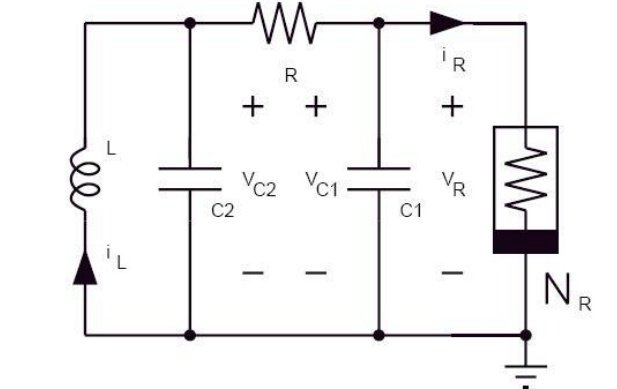


O resistor não linear $N_R$, conhecido como diodo de Chua, é definido de forma linear por pedaços, isto é, dependendo da tensão ele fornece uma resistência diferente. A corrente de $N_R$ é definida por
\begin{equation*}
g(V)=
\begin{cases}
G_b V + (G_b-G_a) E, &\quad \text{se} \quad V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad V \geq E\\
\end{cases}
\end{equation*}

onde $G_a$ e $G_b$ são inclinações das curvas da relação tensão ($V$) versus corrente ($i$) e $E>0$ é um valor de tensão de corte para mudança de regime, conforme o gráfico abaixo.

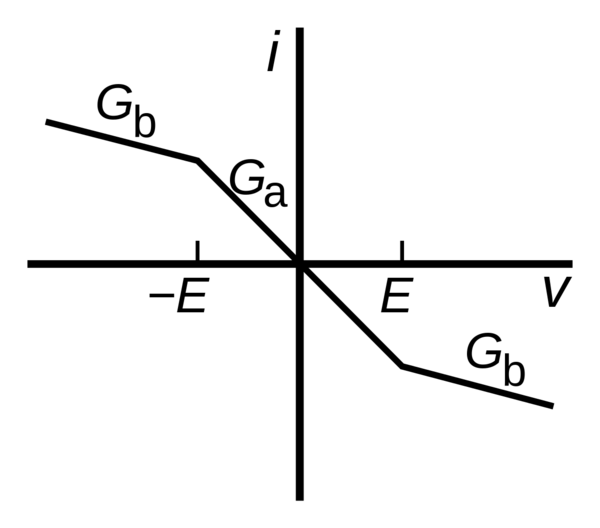


Usando as leis de  Kirchhoff para esse circuito é possível deduzirmos o seguinte sistema de equações diferenciais para as tensões nos capacitores ($V_{C_1}$ e $V_{C_2}$) e a corrente no indutor ($I_L$),
\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}


O interessante desse circuito é que ele é simples de ser montado (veja aqui: https://inst.eecs.berkeley.edu/~ee129/sp10/handouts/ChuasCircuitForHighSchoolStudents-PREPRINT.pdf ) e define um sistema dinâmico caótico, para o qual pequenas variações nos parâmetros e condições iniciais podem levar a soluções bastante distintas!

Vamos ver um exemplo de solução desse problema baseado em http://www.chuacircuits.com/ !

#### Exemplo de Circuito de Chua


Vamos considerar os seguintes parâmetros fixados:

*   Alimentação por bateria de $9V$
*   $C_1  =  10 nF $
*   $C_2 = 100 nF $
*   $L = 18 mH $

Para o resistor não linear considerar:
*  $E=1.17391304 V,$
*  $G_a=-50/66 mS,$
*  $G_b=-9/22 mS. $

Para simular um comportamento passível de ser implementado fisicamente, o resistor não linear precisa de parâmetros adicionais para manter o sistema dentro de tensões realizáveis. Considere que a equação definida anteriormente para o resistor não linear é válida para tensões em módulo menores que $E_{\max}$. Para tensões maiores do que isso, considerar
\begin{equation*}
g(V)=
\begin{cases}
G_c V + E_{\max} (G_c-G_b) +  E (G_b-G_a) & \quad \text{se} \quad V \leq -E_{\max} \\
G_b V + (G_b-G_a) E, &\quad \text{se} \quad -E_{\max} < V \leq -E \\
G_a V, &\quad \text{se} \quad -E < V < E \\
G_b V + (G_a-G_b) E, &\quad \text{se} \quad E \leq V < E_{\max}\\
G_c V + E_{\max} (G_b-G_c) +  E (G_a-G_b) & \quad \text{se} \quad  E_{\max} \leq V \\
\end{cases}
\end{equation*}
Adotaremos $E_{\max}=8.1818$ V e $G_c=4.591$ mS.



In [ ]:
# Definindo os parâmetros
C1 = 10 * 10 ** (-9)
print("C1 =", C1, "F")

C2 = 100 * 10 ** (-9)
print("C2 =", C2, "F")

L = 18 * 10 ** (-3)
print("L =", L, "H")

E = 1.17391304
print("E =", E, "V")

Emax = 8.1818
print("Emax =", Emax, "V")

Ga = -(50 / 66) * 10 ** (-3)
print("Ga =", Ga, "S")

Gb = -(9 / 22) * 10 ** (-3)
print("Gb =", Gb, "S")

Gc = 4.591 * 10 ** (-3)
print("Gc =", Gc, "S")

R = 1800
print("R =", R, "Ohms")

In [ ]:
# Função g
#  (não é vetorial por conta dos ifs!)
def g(V):
    if V <= -Emax:
        return Gc * V + Emax * (Gc - Gb) + E * (Gb - Ga)
    if V <= -E:
        return Gb * V + E * (Gb - Ga)
    if V <= E:
        return Ga * V
    if V <= Emax:
        return Gb * V + E * (Ga - Gb)
    if V >= Emax:
        return Gc * V + Emax * (Gb - Gc) + E * (Ga - Gb)

In [ ]:
# Voltagens de teste para gráfico da função g
v = np.linspace(-10, 10, 200)
gv = np.zeros_like(v)
for i, vi in enumerate(v):
    gv[i] = g(vi)

figure, axs = plt.subplots(figsize=(6, 5))
plt.title("Curva do Diodo de Chua")
plt.xlabel("V")
plt.ylabel("g(V)")
plt.plot(v, gv, "-", label="g(V)", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.show()

Ao final, temos o sguinte sistema de EDOs:


\begin{eqnarray*}
\dot{V}_{C_1}&=&\frac{1}{R C_1}(V_{C_2}-V_{C_1})-\frac{1}{C_1} g(V_{C_1}), \\
\dot{V}_{C_2}&=&\frac{1}{R C_2}(V_{C_1}-V_{C_2})+\frac{1}{C_2}I_L,\\
\dot{I}_L&=&-\frac{1}{L}V_{C_2}.
\end{eqnarray*}

Assumiremos como condições iniciais $V_{C_1}=-0.5V$, $V_{C_2}=-0.2$ e $I_L=0$. Vamos variar o valor do resistor ($R$) nos experimentos a seguir.

### ❗Exercício 4❗

Este sistema é um sistema que com características caóticas dependendo dos parêmetros. Vamos simular as características do sistema variando a resistência $R$, como faríamos no caso prático, girando um potenciômetro.

**Tarefa**: Simule, usando o seu método de Runge–Kutta–Fehlberg vetorial o sistema variando a resistência entre $R=1000 \Omega$ e $R=3000 \Omega$ , fazendo 2 tipos de gráficos:
- Gráficos da evolução de $V_{C_1}(t)$, $V_{C_2}(t)$ e $I_L(t)$ ao longo do tempo, no plano $(t, y)$.
- Gráficos das órbitas/trajetórias de $V_{C_1}(t)$, $V_{C_2}(t)$ e $I_L(t)$ em dimensão 3, plotanto a curva $(V_{C_1}(t),V_{C_2}(t),I_L(t))$.

Responda:
1.  Para que valores de $R$ o sistema converge para uma órbita periódica? Neste caso, passado um certo tempo (longo) o sistema fica rodando em ciclos, retornando a condições que já teve depois de um período. (Por conta da precisão do método e da aritmética de ponto flutuante, a órbita não será exatamente periódica, mas deve retornar após um certo tempo a um ponto bem próximo de onde já esteve antes).
2.  Para que valores de $R$ o sistema converge para um um ponto estacionário? (Ponto atrator, de equilíbrio do sistema).
3.  Encontre os valores críticos de $R$ para os quais o sistema deixa de convergir para órbitas perídicas e passa a oscilar em um "atrator estranho" (parecem asas de borboleta em 3D?). Esses valores de $R$ são conhecidos como pontos de bifurcação do sistema.

As respostas podem ser aproximadas (valores de $R$). Tente comentar sobre o comportamento da solução em cada caso, e se há comportamentos diferentes dentre as possíveis órbitas perídicas.

**Observação:** O objetivo dessa atividade é verificar que mesmo em sistemas dinâmicos (sistemas de EDOs) originados de problemas práticos, neste caso um circuito eletrônico, as soluções podem ter características bem distintas dependendo dos parâmetros. Com isso, fica o alerta sobre a sensibilidade a parâmetros em certos problemas reais!



In [ ]:
# Códigos

def f(t, u):
    VC1, VC2, IL = u
    return np.array(
        [
            (((1 / (R * C1)) * (VC2 - VC1)) - ((1 / C1) * g(VC1))),
            (((1 / (R * C2)) * (VC1 - VC2)) + ((1 / C2) * IL)),
            ((-1 / L) * VC2),
        ]
    )


# Condições iniciais
VC1 = -0.5
VC2 = -0.2
IL = 0
u0 = np.array([VC1, VC2, IL])

t0 = 0 
T = 0.1
h0 = 0.1 # Passo inicial (= T-t0 / n -> n = 100)

tol = 0.1

R = 1800
  
print('R: ', R)

t_rkf, u_rkf, passos_rkf = rkf(f, t0, T, u0, h0, tol)

VC1_rkf = u_rkf[:, 0]
VC2_rkf = u_rkf[:, 1]
IL_rkf = u_rkf[:, 2]

figure, axs = plt.subplots(figsize=(5, 4))
plt.plot(
    t_rkf, VC1_rkf, label=f"VC1", linewidth=1
)
plt.plot(
    t_rkf, VC2_rkf, label=f"VC2", linewidth=1
)
plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.tight_layout()
plt.show()

figure, axs = plt.subplots(figsize=(5, 4))
plt.plot(
  t_rkf, IL_rkf, label=f"Il", linewidth=1
)
plt.xlabel("t")
plt.ylabel("A")
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 3D das trajetórias
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(VC1_rkf, VC2_rkf, IL_rkf, label=f'R0 = {R}Ω')
ax.set_xlabel('V1 (V)')
ax.set_ylabel('V2 (V)')
ax.set_zlabel('Il (A)')
ax.legend()
plt.tight_layout()
plt.show()

Valores de $R$ das questões e comentários:

Utilizando um intervalo de tempo T=0.1

1. Para valores nos intervalos aproximados $1000 \le R < 1530$ e $1940 \le R < 2020$ o sistema converge para uma órbita periódica.

2. Para valores no intervalo $R > 2030$ o sistema converge para um ponto estacionário.

3. Para valores no intervalo $1530 \le R < 1940$ o sistema apresenta comportamento de com pontos de bifurcação.

É muito interessante perceber como uma pequena variação em R pode gerar comportamentos tão diferentes nos valores, definindo de fato um sistema caótico.

Também percebe-se que dentro desses intervalos ainda pode haver uma grande variação no comportamento desses valores. Ao rodar a célula abaixo, percebe-se os diferentes comportamentos, variando em intervalos de 100Ω.

In [ ]:
R = 1000

while R <= 3000:
  
  print('R: ', R)

  t_rkf, u_rkf, passos_rkf = rkf(f, t0, T, u0, h0, tol)

  VC1_rkf = u_rkf[:, 0]
  VC2_rkf = u_rkf[:, 1]
  IL_rkf = u_rkf[:, 2]

  figure, axs = plt.subplots(figsize=(5, 4))
  plt.plot(
      t_rkf, VC1_rkf, label=f"VC1", linewidth=1
  )
  plt.plot(
      t_rkf, VC2_rkf, label=f"VC2", linewidth=1
  )
  plt.xlabel("t")
  plt.ylabel("u")
  plt.legend()
  plt.tight_layout()
  plt.show()

  figure, axs = plt.subplots(figsize=(5, 4))
  plt.plot(
    t_rkf, IL_rkf, label=f"Il", linewidth=1
  )
  plt.xlabel("t")
  plt.ylabel("A")
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Gráfico 3D das trajetórias
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(VC1_rkf, VC2_rkf, IL_rkf, label=f'R0 = {R}Ω')
  ax.set_xlabel('V1 (V)')
  ax.set_ylabel('V2 (V)')
  ax.set_zlabel('Il (A)')
  ax.legend()
  plt.tight_layout()
  plt.show()

  R += 250



---



---

